In [121]:
#Import Dependencies
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import pymysql
pymysql.install_as_MySQLdb()

In [11]:
###Import Datasets
#Draft Data
draft_file = "./Datasets/draft78.csv"
draft_df = pd.read_csv(draft_file)
#Salery Data
salary_file = "./Datasets/Player - Salaries per Year (1990 - 2017).xlsx"
salary_df = pd.read_excel(salary_file)
#Player Data
player_file = "./Datasets/player_data.csv"
player_df = pd.read_csv(player_file)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [12]:
#Draft Summary
draft_df.head()

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978


In [13]:
#Salary Summary
salary_df.head()

,Register Value,Player Name,Salary in $,Season Start,Season End,Team,Full Team Name
0,1,A.C. Green,1750000,1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,1750000,1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,1750000,1992,1993,LAL,Los Angeles Lakers
3,1103,A.C. Green,1885000,1993,1994,PHO,Phoenix Suns
4,1497,A.C. Green,6472600,1994,1995,PHO,Phoenix Suns


In [15]:
#Player Summary
player_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [18]:
#Cleaning player_df and draft_df
player_df = player_df.drop(columns=['year_start', 'year_end'])
draft_df = draft_df.drop(columns=['Yrs'])

,Pick,Player,Draft
0,1,Mychal Thompson,1978
1,2,Phil Ford,1978
2,3,Rick Robey,1978
3,4,Micheal Ray Richardson,1978
4,5,Purvis Short,1978


In [28]:
#Merging Salary and Draft
salary_df_2 = pd.merge(salary_df,  draft_df, how='inner', left_on='Player Name', 
                       right_on='Player', copy=False)
salary_df_2 = salary_df_2.drop(columns=['Player'])

In [29]:
salary_df_2

,Register Value,Player Name,Salary in $,Season Start,Season End,Team,Full Team Name,Pick,Draft
0,1,A.C. Green,1750000,1990,1991,LAL,Los Angeles Lakers,23,1985
1,354,A.C. Green,1750000,1991,1992,LAL,Los Angeles Lakers,23,1985
2,727,A.C. Green,1750000,1992,1993,LAL,Los Angeles Lakers,23,1985
3,1103,A.C. Green,1885000,1993,1994,PHO,Phoenix Suns,23,1985
4,1497,A.C. Green,6472600,1994,1995,PHO,Phoenix Suns,23,1985
5,1832,A.C. Green,6473000,1995,1996,PHO,Phoenix Suns,23,1985
6,2207,A.C. Green,4851000,1996,1997,DAL,Dallas Mavericks,23,1985
7,2977,A.C. Green,5125088,1998,1999,DAL,Dallas Mavericks,23,1985
8,3350,A.C. Green,1700000,1999,2000,LAL,Los Angeles Lakers,23,1985
9,3701,A.C. Green,2250000,2000,2001,MIA,Miami Heat,23,1985


In [33]:
#Merging New Salary Dataframe with Player Info and dropping unnecessary
final_df = pd.merge(salary_df_2, player_df, left_on='Player Name', right_on='name')
final_df = final_df.drop(columns=['Register Value','Team', 'name'])

,Player Name,Salary in $,Season Start,Season End,Full Team Name,Pick,Draft,position,height,weight,birth_date,college
0,A.C. Green,1750000,1990,1991,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,A.C. Green,1750000,1991,1992,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
2,A.C. Green,1750000,1992,1993,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
3,A.C. Green,1885000,1993,1994,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
4,A.C. Green,6472600,1994,1995,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University


In [36]:
#Renaming Columns to dump into SQL DB
final_df = final_df.rename(columns={
    'Player Name':'player_name', 'Salary in $': 'salary', 'Season Start': 'season_start',
    'Season End':'season_end', 'Full Team Name': 'team_name', 'Pick':'draft_rank',
    'Draft':'draft_name'
})
final_df.head()

,player_name,salary,season_start,season_end,team_name,draft_rank,draft,position,height,weight,birth_date,college
0,A.C. Green,1750000,1990,1991,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,A.C. Green,1750000,1991,1992,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
2,A.C. Green,1750000,1992,1993,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
3,A.C. Green,1885000,1993,1994,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
4,A.C. Green,6472600,1994,1995,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University


In [39]:
#Setting up connection to SQL
connection_string = "root:S2hockey@localhost/nba_db"
engine = create_engine(f'mysql://{connection_string}')
engine.table_names()

['nba_info']

In [40]:
#Load Data into SQL
final_df.to_sql(name='nba_info', con=engine, if_exists='append', index=False)

In [62]:
#Create new dataframe for analysis
final_a_df = final_df.groupby('player_name').max()
final_a_df.head()

,salary,season_start,season_end,team_name,draft_rank,draft,position,height,weight,birth_date,college
player_name,,,,,,,,,,,
A.C. Green,6473000,2000,2001,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
A.J. Bramlett,118974,1999,2000,Cleveland Caveliers,39,1999,C,6-10,227.0,"January 10, 1977",University of Arizona
A.J. English,406000,1993,1994,Washington Wizards,37,1990,G,6-3,175.0,"July 11, 1967",Virginia Union University
A.J. Guyton,465850,2002,2003,Golden State Warriors,32,2000,G,6-1,180.0,"February 12, 1978",Indiana University
A.J. Price,885120,2014,2015,Washington Wizards,52,2009,G,6-2,181.0,"October 7, 1986",University of Connecticut


In [103]:
#Converting height to inches
heights = final_a_df['height'].str.split('-', n = 1, expand = True)
heights = heights[[0,1]].astype('int64')
heights['height_inches'] = 12*heights[0] + heights[1]
heights = heights[['height_inches']]

,height_inches
player_name,
A.C. Green,81
A.J. Bramlett,82
A.J. English,75
A.J. Guyton,73
A.J. Price,74
Aaron Brooks,72
Aaron Gordon,81
Aaron Gray,84
Aaron McKie,77


In [113]:
#Pulling Just the Salaries
just_salaries = final_a_df[['salary']]
#Merging with height table
heights1 = pd.merge(heights, just_salaries, on='player_name')
#Creating new table with average salaries grouped by height in inches
heights2 = heights1.groupby('height_inches').mean()
heights2

,salary
height_inches,
63,2.800000e+06
66,2.071600e+06
67,3.000000e+05
69,5.869303e+06
70,2.698669e+06
71,4.041812e+06
72,5.270485e+06
73,4.714818e+06
74,2.931423e+06


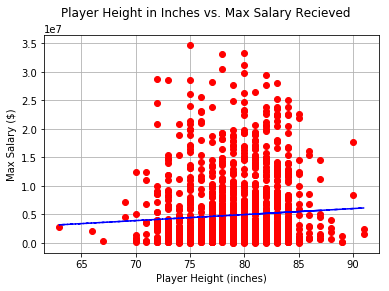

The slope of the line of best fit is 105591.20009693105
The correlation coefficient is 0.06395703097085799


In [122]:
###Creating Linear Regression for Height in Inches vs. Max Salary for all players

#Importing Stats and Matplotlib
from scipy.stats import linregress
import matplotlib.pyplot as plt
#Making Line of Best Fit
(slope, intercept, _, _, _) = linregress(heights1['height_inches'], heights1['salary'])
fit = slope * heights1['height_inches'] + intercept
#Making Plot
#Making plot
fig, ax = plt.subplots()
fig.suptitle("Player Height in Inches vs. Max Salary Recieved", fontsize=12)
ax.set_xlabel("Player Height (inches)")
ax.set_ylabel("Max Salary ($)")
ax.plot(heights1['height_inches'], heights1['salary'], color = 'red', linewidth=0, marker='o')
ax.plot(heights1['height_inches'], fit, 'b--')
plt.grid()
plt.show()
corr_coef = np.corrcoef(heights1['height_inches'], heights1['salary'])[0, 1]
print('The slope of the line of best fit is ' + str(slope))
print(f'The correlation coefficient is {corr_coef}')

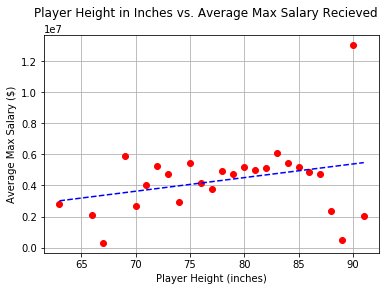

The slope of the line of best fit is 87847.06378979368
The correlation coefficient is 0.29499621506247503


In [124]:
###Creating Linear Regression for Height in Inches vs. Max Salary grouped by Height
#Making Line of Best Fit
(slope2, intercept2, _, _, _) = linregress(heights2.index.values, heights2['salary'])
fit2 = slope2 * heights2.index.values + intercept2
#Making Plot
#Making plot
fig2, ax2 = plt.subplots()
fig2.suptitle("Player Height in Inches vs. Average Max Salary Recieved", fontsize=12)
ax2.set_xlabel("Player Height (inches)")
ax2.set_ylabel("Average Max Salary ($)")
ax2.plot(heights2.index.values, heights2['salary'], color = 'red', linewidth=0, marker='o')
ax2.plot(heights2.index.values, fit2, 'b--')
plt.grid()
plt.show()
corr_coef2 = np.corrcoef(heights2.index.values, heights2['salary'])[0, 1]
print('The slope of the line of best fit is ' + str(slope2))
print(f'The correlation coefficient is {corr_coef2}')

In [118]:
#Making a draft table
draft_rank = final_a_df[['draft_rank', 'salary']]
draft_rank = draft_rank.groupby('draft_rank').mean()
draft_rank.head()

,salary
draft_rank,
1,1.228964e+07
2,1.041986e+07
3,1.228317e+07
4,1.060049e+07
5,9.935762e+06


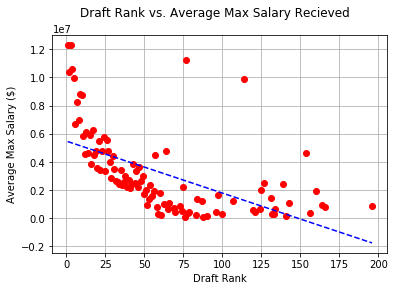

The slope of the line of best fit is -36946.44053206166
The correlation coefficient is -0.5768357125308243


In [125]:
#Making linear regression for draft rank vs. average salary
#Making Line of Best Fit
(slope3, intercept3, _, _, _) = linregress(draft_rank.index.values, draft_rank['salary'])
fit3 = slope3 * draft_rank.index.values + intercept3
#Making Plot
#Making plot
fig3, ax3 = plt.subplots()
fig3.suptitle("Draft Rank vs. Average Max Salary Recieved", fontsize=12)
ax3.set_xlabel("Draft Rank")
ax3.set_ylabel("Average Max Salary ($)")
ax3.plot(draft_rank.index.values, draft_rank['salary'], color = 'red', linewidth=0, marker='o')
ax3.plot(draft_rank.index.values, fit3, 'b--')
plt.grid()
plt.show()
corr_coef3 = np.corrcoef(draft_rank.index.values, draft_rank['salary'])[0, 1]
print('The slope of the line of best fit is ' + str(slope3))
print(f'The correlation coefficient is {corr_coef3}')